# Decision Tree: German Credit Data

## Background

##### This dataset contains information on loans information obtained from a credit agency.

##### This dataset include 1,000 examples on loans, plus a set of numeric and nominal features indicating the characteristics of the load and the loan applicant.

##### The target variable indicates if the loan went to default


## Data dictionary

| Variable              | Type         | Values / Codes                                                                                                   | Description                                      |
|------------------------|-------------|------------------------------------------------------------------------------------------------------------------|--------------------------------------------------|
| checking_balance       | Categorical | A11: < 0 DM<br>A12: 0 ≤ … < 200 DM<br>A13: ≥ 200 DM  <br>A14: no checking account                  | Status of existing checking account              |
| months_loan_duration   | Numeric     | e.g., 6, 12, 24, 36                                                                                              | Duration in months                               |
| credit_history         | Categorical | A30: no credits / all paid duly<br>A31: all credits at this bank paid duly<br>A32: credits paid duly till now<br>A33: delay in past<br>A34: critical / other credits | Credit history                                   |
| purpose                | Categorical | A40: car (new)<br>A41: car (used)<br>A42: furniture/equipment<br>A43: radio/TV<br>A44: domestic appliances<br>A45: repairs<br>A46: education<br>A47: vacation (?)<br>A48: retraining<br>A49: business<br>A410: others | Purpose of loan                                  |
| amount                 | Numeric     | e.g., 1000, 2500, 5000                                                                                            | Loan amount                                    |
| savings_balance         | Categorical | A61: < 100 DM<br>A62: 100 ≤ … < 500 DM<br>A63: 500 ≤ … < 1000 DM<br>A64: ≥ 1000 DM<br>A65: no savings account     | Savings account / bonds                          |
| employment_duration    | Categorical | A71: unemployed<br>A72: < 1 yr<br>A73: 1–4 yrs<br>A74: 4–7 yrs<br>A75: ≥ 7 yrs                                    | Present employment duration                      |
| percent_of_income      | Numeric     | e.g., 1, 2, 3, 4                                                                                                 | Installment rate (% of disposable income)        |
| years_at_residence     | Numeric     | e.g., 1, 2, 3, 4                                                                                                 | Present residence duration (years)               |
| age                    | Numeric     | e.g., 25, 35, 50                                                                                                 | Age in years                                     |
| other_credit           | Categorical | A141: bank<br>A142: stores<br>A143: none                                                                          | Other installment plans                          |
| housing                | Categorical | A151: rent<br>A152: own<br>A153: for free                                                                         | Housing situation                                |
| existing_loans_count   | Numeric     | e.g., 1, 2, 3                                                                                                    | Number of existing credits at this bank          |
| job                    | Categorical | A171: unemployed / unskilled non-resident<br>A172: unskilled resident<br>A173: skilled employee / official<br>A174: management / self-employed / highly qualified / officer | Job type                                         |
| dependents             | Numeric     | e.g., 1, 2                                                                                                       | Number of dependents                             |
| phone                  | Categorical | A191: none<br>A192: yes, registered                                                                               | Has telephone                                    |
| default                | Target      | yes / no                                                                                                         | Credit risk (target variable: default or not)    |





## Data Preprocessing & Cleaning


In [26]:
import pandas as pd

# work with colab
from google.colab import drive
drive.mount('/content/drive')

default = pd.read_csv('/content/drive/My Drive/credit.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
default.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,A75,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,A73,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,A74,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,A74,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,A73,3,4,53,A143,A153,2,A173,2,A191,yes


In [28]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [29]:
# Get the count of 'yes' and 'no' values in the 'default' column
default_counts = default['default'].value_counts()

print("Count of 'yes' and 'no' in 'default' column:")
print(default_counts)

Count of 'yes' and 'no' in 'default' column:
default
no     700
yes    300
Name: count, dtype: int64


## Data Exploratory Analysis

Draft **3 questions that interest you most** based on the dataset.  

### Examples
- *How does loan purpose relate to default?*  
- *How does checking balance relate to default?*  
- *How does loan duration relate to default?*  

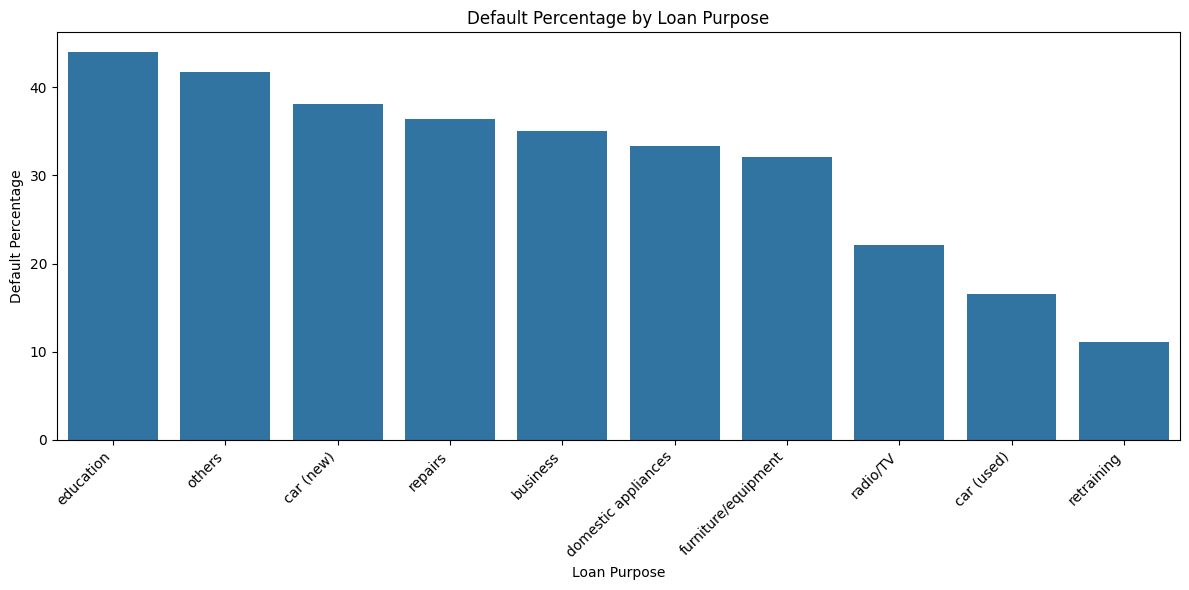

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the percentage of default for each loan purpose
purpose_default_percentage = default.groupby('purpose')['default'].value_counts(normalize=True).unstack().get('yes', pd.Series(0, index=default['purpose'].unique())) * 100

# Sort the purposes by default percentage for better visualization
purpose_default_percentage = purpose_default_percentage.sort_values(ascending=False)

# Define the mapping from codes to descriptive labels
purpose_labels = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/TV',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation (?)',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}

# Replace the index with descriptive labels
purpose_default_percentage.index = purpose_default_percentage.index.map(purpose_labels)


# Plot the default percentage by purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_default_percentage.index, y=purpose_default_percentage.values)
plt.title('Default Percentage by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

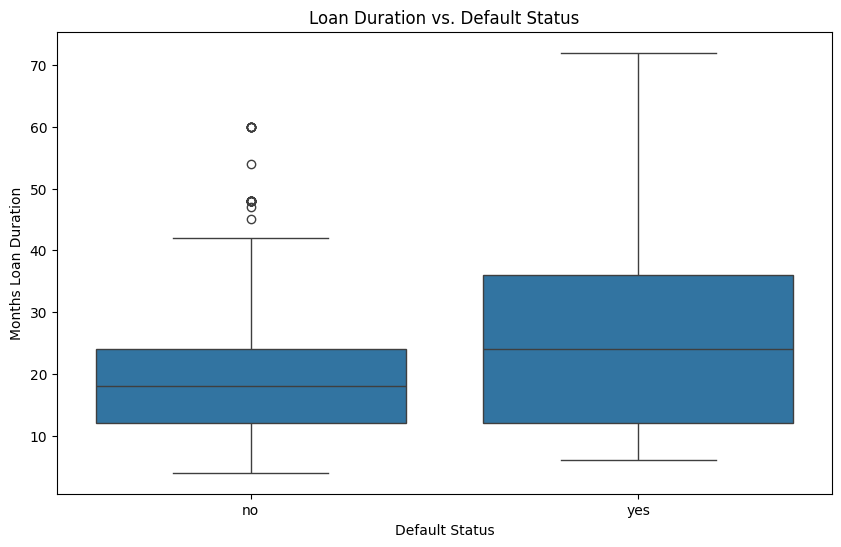

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='default', y='months_loan_duration', data=default)
plt.title('Loan Duration vs. Default Status')
plt.xlabel('Default Status')
plt.ylabel('Months Loan Duration')
plt.show()

## Catagorical Variables: Encoding

| **Encoding Method**            | **How it Works**                                      | **Best For**             | **Example Code**                                                        |
| ------------------------------ | ----------------------------------------------------- | ------------------------ | ----------------------------------------------------------------------- |
| **Label / Ordinal Encoding**   | Assigns integers (`Low=1, Med=2, High=3`)             | Ordinal features         | `df["edu_enc"] = le.fit_transform(df["education"])`                     |
| **One-Hot Encoding**           | Creates binary columns per category                   | Nominal, few categories  | `pd.get_dummies(df, columns=["purpose"])`                               |
| **Target / Mean Encoding**     | Replace category with mean target (e.g. default rate) | Nominal, many categories | `df["purpose_te"] = df.groupby("purpose")["default"].transform("mean")` |
| **Frequency / Count Encoding** | Replace category with frequency of occurrence         | High-cardinality nominal | `df["purpose_freq"] = df["purpose"].map(df["purpose"].value_counts())`  |



In [32]:
# Ordinal encoding for employment_duration
employment_duration_mapping = {
    'A71': 0, # unemployed
    'A72': 1, # < 1 yr
    'A73': 2, # 1–4 yrs
    'A74': 3, # 4–7 yrs
    'A75': 4  # ≥ 7 yrs
}

default['employment_duration'] = default['employment_duration'].map(employment_duration_mapping)

display(default.head())

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,A11,6,A34,A43,1169,A65,4,4,4,67,A143,A152,2,A173,1,A192,no
1,A12,48,A32,A43,5951,A61,2,2,2,22,A143,A152,1,A173,1,A191,yes
2,A14,12,A34,A46,2096,A61,3,2,3,49,A143,A152,1,A172,2,A191,no
3,A11,42,A32,A42,7882,A61,3,2,4,45,A143,A153,1,A173,2,A191,no
4,A11,24,A33,A40,4870,A61,2,3,4,53,A143,A153,2,A173,2,A191,yes


In [33]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = default.drop('default', axis=1)
y = default['default']

# Perform dummy encoding on X
X = pd.get_dummies(X, drop_first=True,dtype = 'int')

# Label encode y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

display(X.head())
display(y[0:5])

,months_loan_duration,amount,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_A12,checking_balance_A13,...,savings_balance_A64,savings_balance_A65,other_credit_A142,other_credit_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192
0,6,1169,4,4,4,67,2,1,0,0,...,0,1,0,1,1,0,0,1,0,1
1,48,5951,2,2,2,22,1,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,12,2096,3,2,3,49,1,2,0,0,...,0,0,0,1,1,0,1,0,0,0
3,42,7882,3,2,4,45,1,2,0,0,...,0,0,0,1,0,1,0,1,0,0
4,24,4870,2,3,4,53,2,2,0,0,...,0,0,0,1,0,1,0,1,0,0


array([0, 1, 0, 0, 1])

## Data Splitting into Training and Test

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Decision Tree

Decision Trees in Python are commonly implemented using the **scikit-learn** library.  
They can be used for both **classification** and **regression** tasks.  
Below is a summary of the key functions and methods you’ll use to build, train, evaluate, and visualize decision tree models.  

---

# Decision Tree Functions (Scikit-learn)

| **Function / Class** | **Purpose** | **Key Parameters** | **Example** |
|-----------------------|-------------|---------------------|-------------|
| `DecisionTreeClassifier()` | Build a decision tree for classification tasks | `criterion` (`"gini"` or `"entropy"`), `max_depth`, `min_samples_split`, `min_samples_leaf` | `clf = DecisionTreeClassifier(criterion="gini", max_depth=3)` |
| `DecisionTreeRegressor()` | Build a decision tree for regression tasks | `criterion` (`"squared_error"`, `"friedman_mse"`, `"poisson"`), `max_depth`, `min_samples_split` | `reg = DecisionTreeRegressor(max_depth=4)` |
| `.fit(X, y)` | Train the decision tree model | `X` = features, `y` = target labels | `clf.fit(X_train, y_train)` |
| `.predict(X)` | Predict class labels or values for new data | Input: feature set | `y_pred = clf.predict(X_test)` |
| `.predict_proba(X)` | Return class probabilities (classification only) | Probabilities based on leaf distributions | `clf.predict_proba(X_test)` |
| `.score(X, y)` | Evaluate accuracy (classification) or R² (regression) | Compares predictions vs true labels | `clf.score(X_test, y_test)` |
| `tree.plot_tree(model)` | Visualize the decision tree | Options: `feature_names`, `class_names`, `filled` | `tree.plot_tree(clf, filled=True)` |
| `export_text(model)` | Get text representation of the tree | Option: `feature_names` | `print(export_text(clf, feature_names=cols))` |


## Model Creation on Training Set-DecisionTreeClassifier()

The `DecisionTreeClassifier` in scikit-learn is used for **classification tasks**.  
Its behavior is controlled by several key parameters:  

| **Parameter** | **Description** | **Common Values / Notes** |
|---------------|-----------------|----------------------------|
| `criterion`   | Function to measure the quality of a split | `"gini"` (default), `"entropy"`, `"log_loss"` |
| `max_depth`   | Maximum depth of the tree | Limits overfitting; default = None (grow until pure) |
| `min_samples_split` | Minimum number of samples required to split an internal node | Default = 2 |
| `min_samples_leaf`  | Minimum number of samples required at a leaf node | Prevents leaves with very few samples |
| `max_features` | Number of features to consider when looking for the best split | `"auto"`, `"sqrt"`, `"log2"`, or integer/float |
| `class_weight` | Weights associated with classes | `"balanced"` or dict to handle class imbalance |
| `random_state` | Seed for reproducibility | Any integer value |

---


In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
dt = DecisionTreeClassifier(criterion="entropy", random_state=0)

# Train the model
dt.fit(X_train, y_train)

dt.score(X_train, y_train)

1.0

## Confusion Matrix

A **Confusion Matrix** is a performance evaluation tool for classification models.  
It compares the model’s **predicted labels** with the **true labels** to show how well the classifier is performing.  

---

## Structure of a Confusion Matrix (Binary Classification)

|                | **Predicted Positive** | **Predicted Negative** |
|----------------|-------------------------|-------------------------|
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

- **True Positive (TP):** Correctly predicted positives.  
- **True Negative (TN):** Correctly predicted negatives.  
- **False Positive (FP):** Incorrectly predicted as positive (Type I error).  
- **False Negative (FN):** Incorrectly predicted as negative (Type II error).  

## Functions to Visualize a Confusion Matrix
- `confusion_matrix(y_true, y_pred)` → raw matrix values  
- `ConfusionMatrixDisplay.from_predictions(y_true, y_pred)` → plot from predictions  
- `ConfusionMatrixDisplay.from_estimator(estimator, X, y)` → plot directly from fitted model  




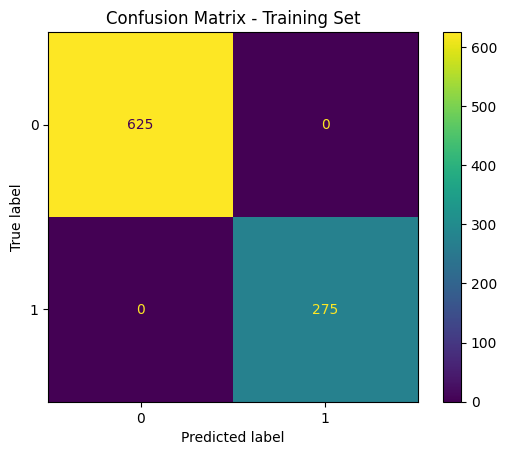

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and plot confusion matrix for the training set using from_estimator
disp_train = ConfusionMatrixDisplay.from_estimator(dt, X_train, y_train)

# Plot the confusion matrix
plt.title("Confusion Matrix - Training Set")
plt.show()

## Model Evaluation on Test Set

We evaluate models to check performance and limitations.  

## Classification
- `accuracy_score` → overall accuracy  
- `precision_score`, `recall_score`, `f1_score` → error balance  
- `confusion_matrix`, `ConfusionMatrixDisplay` → error breakdown  
- `roc_auc_score`, `RocCurveDisplay` → ranking quality (needs probabilities)  
- `log_loss` → probability quality  


Accuracy on test set: 0.800


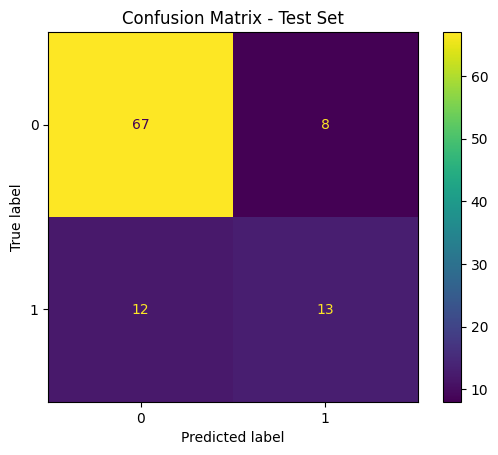

In [37]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = dt.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)


# Print the evaluation metrics
print(f"Accuracy on test set: {accuracy:.3f}")


# Generate and plot confusion matrix for the test set
disp_test = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

# Plot the confusion matrix
plt.title("Confusion Matrix - Test Set")
plt.show()

## Dealing with Overfitting in Classification Tree





### Pre-Pruning Parameters

| **Parameter** | **How it Helps Prevent Overfitting** |
|---------------|---------------------------------------|
| `max_depth`   | Limits how deep the tree can grow. Shallow trees generalize better. |
| `min_samples_split` | Requires a minimum number of samples to split a node. Prevents creating branches from very small subsets. |
| `min_samples_leaf`  | Ensures each leaf has at least this many samples. Reduces overly specific leaves. |
| `max_leaf_nodes`    | Limits the total number of leaves. Smaller number = simpler tree. |
| `max_features`      | Restricts the number of features considered at each split. Adds randomness, reduces variance. |
| `min_impurity_decrease` | A node is split only if the impurity decrease is larger than this threshold. Prevents weak/unnecessary splits. |

In [38]:
tree_pruned = DecisionTreeClassifier(max_depth=6, random_state=0, criterion= "entropy")
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

#from sklearn.metrics import accuracy_score
print("Accuracy on training set:",round(tree_pruned.score(X_train, y_train),3))
print("Accuracy on test set:",accuracy_score(y_pruned_pred, y_test))

Accuracy on training set: 0.799
Accuracy on test set: 0.78


Max Depth: 1, Training Accuracy: 0.694, Test Accuracy: 0.750
Max Depth: 2, Training Accuracy: 0.694, Test Accuracy: 0.750
Max Depth: 3, Training Accuracy: 0.720, Test Accuracy: 0.770
Max Depth: 4, Training Accuracy: 0.747, Test Accuracy: 0.780
Max Depth: 5, Training Accuracy: 0.773, Test Accuracy: 0.790
Max Depth: 6, Training Accuracy: 0.799, Test Accuracy: 0.780
Max Depth: 7, Training Accuracy: 0.814, Test Accuracy: 0.780
Max Depth: 8, Training Accuracy: 0.839, Test Accuracy: 0.660
Max Depth: 9, Training Accuracy: 0.864, Test Accuracy: 0.710
Max Depth: 10, Training Accuracy: 0.884, Test Accuracy: 0.680


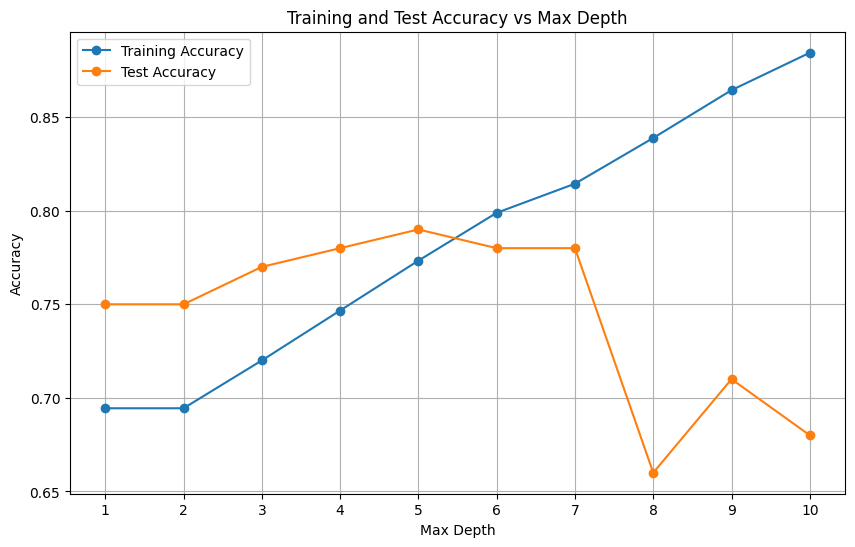

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Range of max_depth values to test
max_depth_range = range(1, 11)

# Lists to store the training and test accuracies for each max_depth
train_accuracies = []
test_accuracies = []

# Iterate through max_depth values
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0, criterion= "entropy")
    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Evaluate the model on the training data
    train_accuracy = clf.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the test data
    test_accuracy = clf.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

    print(f"Max Depth: {depth}, Training Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")

# Plot the training and test accuracies vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_accuracies, marker='o', label="Training Accuracy")
plt.plot(max_depth_range, test_accuracies, marker='o', label="Test Accuracy")
plt.title('Training and Test Accuracy vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_range)
plt.legend()
plt.grid(True)
plt.show()

### Post-pruning


- **Cost-Complexity Pruning (CCP):**  
  - Each subtree has a cost = misclassification error + penalty for size.  
  - `ccp_alpha` controls the trade-off:  
    - Small `ccp_alpha` → larger tree (low bias, high variance).  
    - Large `ccp_alpha` → smaller tree (higher bias, lower variance).  

- **How to apply in scikit-learn:**  
  1. Get candidate alphas:  
     ```python
     path = clf.cost_complexity_pruning_path(X_train, y_train)
     ccp_alphas = path.ccp_alphas
     ```
  2. Train trees with different `ccp_alpha` values.  
  3. Compare training vs. test accuracy to select the best alpha.  

**Goal:** Find the smallest tree that still performs well on unseen data.  


In [40]:

# Calculate the effective alphas for pruning
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Lists to store the training and test accuracies for each ccp_alpha
train_accuracies_pruning = []
test_accuracies_pruning = []

# Iterate through ccp_alpha values
for ccp_alpha in ccp_alphas:
    clf_post = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha, criterion="entropy")
    # Train the model on the training data
    clf_post.fit(X_train, y_train)

    # Evaluate the model on the training data
    train_accuracy = clf_post.score(X_train, y_train)
    train_accuracies_pruning.append(train_accuracy)

    # Evaluate the model on the test data
    test_accuracy = clf_post.score(X_test, y_test)
    test_accuracies_pruning.append(test_accuracy)

    print(f"ccp_alpha: {ccp_alpha:.4f}, Training Accuracy: {train_accuracy:.3f}, Test Accuracy: {test_accuracy:.3f}")



ccp_alpha: 0.0000, Training Accuracy: 1.000, Test Accuracy: 0.800
ccp_alpha: 0.0022, Training Accuracy: 0.994, Test Accuracy: 0.800
ccp_alpha: 0.0022, Training Accuracy: 0.994, Test Accuracy: 0.800
ccp_alpha: 0.0022, Training Accuracy: 0.994, Test Accuracy: 0.800
ccp_alpha: 0.0022, Training Accuracy: 0.994, Test Accuracy: 0.800
ccp_alpha: 0.0024, Training Accuracy: 0.993, Test Accuracy: 0.800
ccp_alpha: 0.0026, Training Accuracy: 0.990, Test Accuracy: 0.780
ccp_alpha: 0.0026, Training Accuracy: 0.989, Test Accuracy: 0.780
ccp_alpha: 0.0027, Training Accuracy: 0.982, Test Accuracy: 0.780
ccp_alpha: 0.0028, Training Accuracy: 0.981, Test Accuracy: 0.780
ccp_alpha: 0.0028, Training Accuracy: 0.980, Test Accuracy: 0.780
ccp_alpha: 0.0029, Training Accuracy: 0.979, Test Accuracy: 0.780
ccp_alpha: 0.0029, Training Accuracy: 0.977, Test Accuracy: 0.780
ccp_alpha: 0.0031, Training Accuracy: 0.964, Test Accuracy: 0.800
ccp_alpha: 0.0031, Training Accuracy: 0.964, Test Accuracy: 0.800
ccp_alpha:

## Visualizing and Analyzing the Tree

| **Attribute** | **Description** |
|---------------|-----------------|
| `classes_` | The class labels (as seen during training). |
| `feature_importances_` | Importance of each feature in making splits (higher = more important). |
| `n_classes_` | Number of classes in the target. |
| `n_features_in_` | Number of input features seen during training. |
| `tree_` | The underlying Tree object (stores structure, nodes, thresholds, etc.). |
| `max_features_` | Number of features considered at each split (resolved value of `max_features`). |
| `n_outputs_` | Number of outputs (for multi-output problems). |




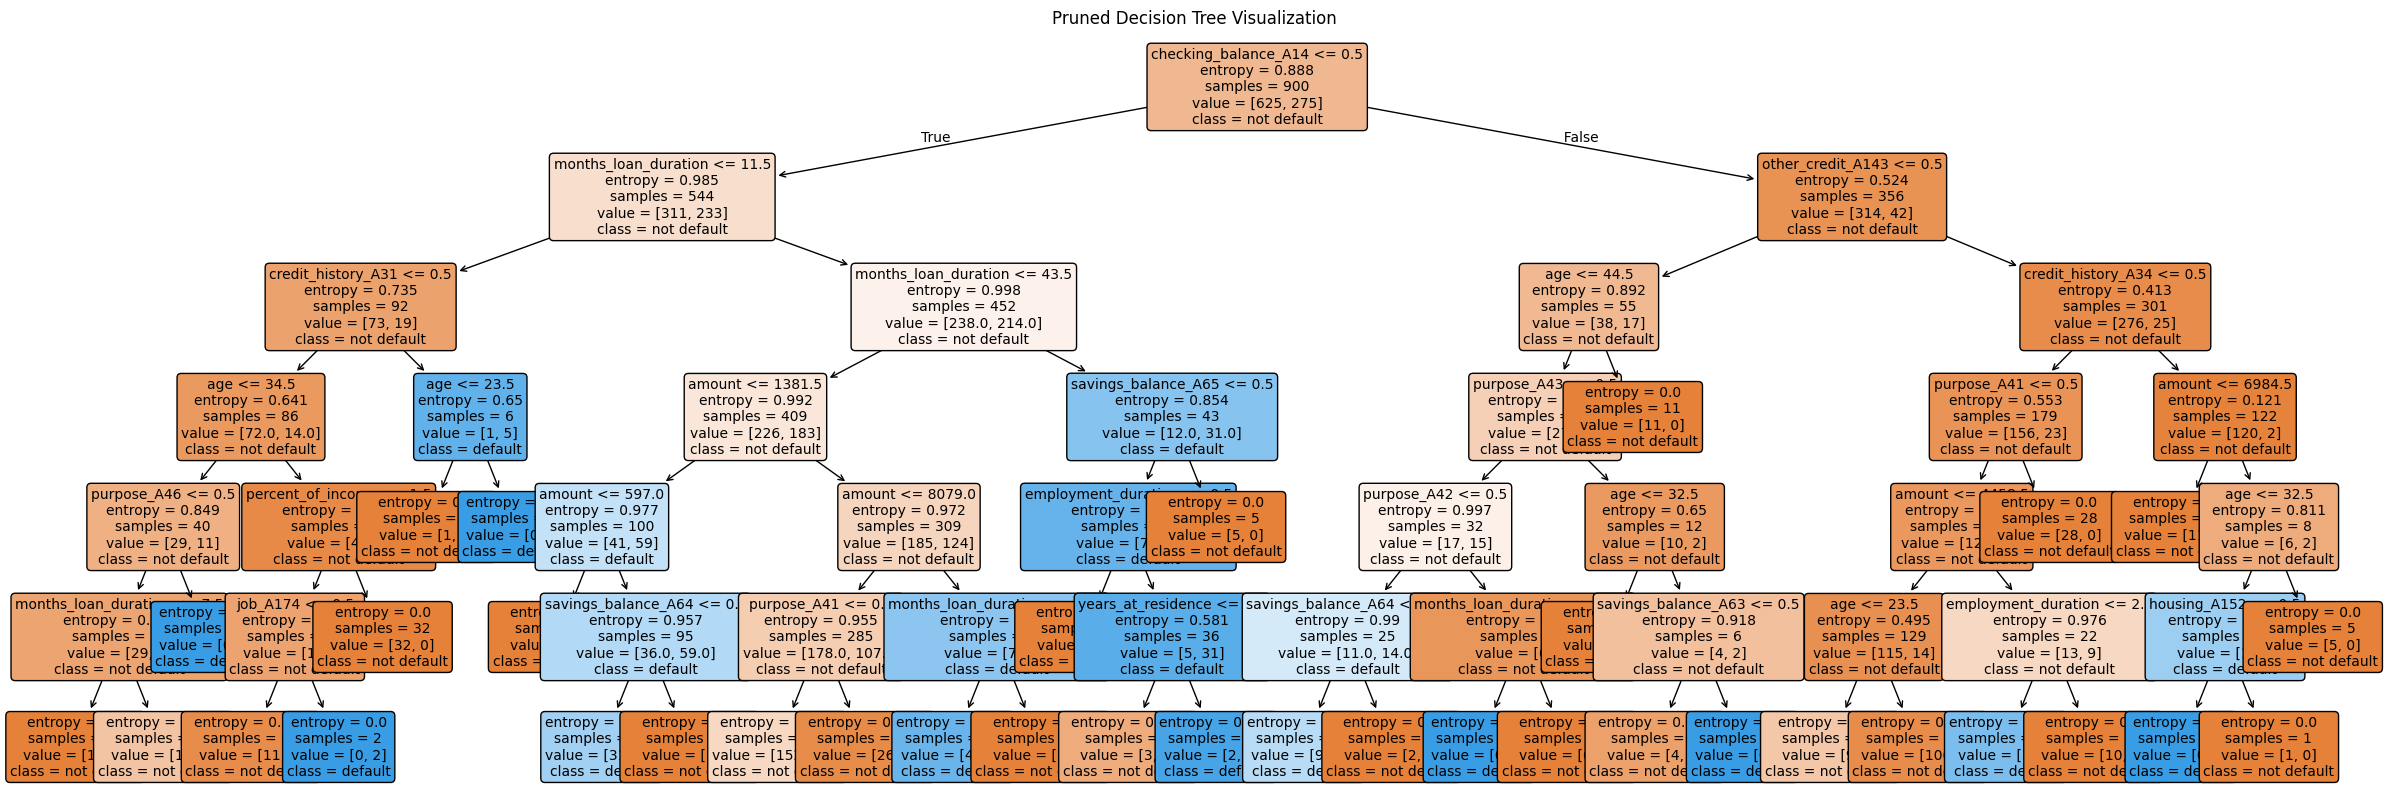

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'tree_pruned' is the name of your pruned tree model
# and 'X' is your feature DataFrame used for training

fig = plt.figure(figsize=(30,10))
plot_tree(tree_pruned,
              feature_names=X.columns,
              class_names=["not default", "default"],
              filled=True,
              rounded=True,
              fontsize=10)
plt.title("Pruned Decision Tree Visualization")
plt.show()

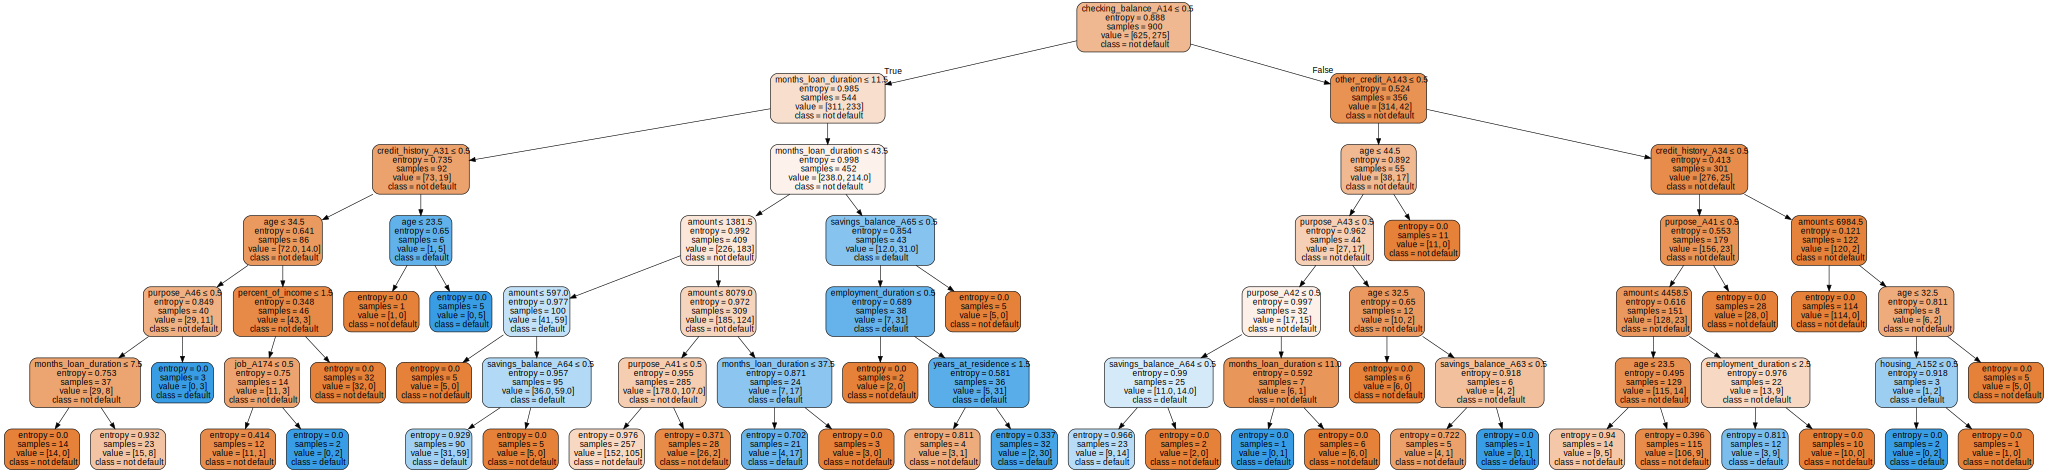

In [42]:
# Install graphviz if you haven't already
#!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree in DOT format
dot_data = export_graphviz(tree_pruned,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=["not default", "default"],
                           filled=True, rounded=True,
                           special_characters=True)

# Render the DOT data using graphviz
graph = graphviz.Source(dot_data)

# Display the graph
graph

In [43]:
# Save the graph to a file (e.g., PNG format)
# You can change the filename and format as needed
graph.render("pruned_decision_tree", view=False, format='png')

print("Graphviz visualization saved as 'pruned_decision_tree.png'")

Graphviz visualization saved as 'pruned_decision_tree.png'


### Feature Importance

In [44]:

# Get feature importances from the pruned tree model
feature_importances = tree_pruned.feature_importances_

# Create a DataFrame of feature importances
# X.columns contains the feature names in the correct order
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importance for the Pruned Decision Tree:")
display(feature_importance_df)

Feature Importance for the Pruned Decision Tree:


,Feature,Importance
10,checking_balance_A14,0.252174
0,months_loan_duration,0.139571
1,amount,0.123255
5,age,0.088649
15,purpose_A41,0.055837
2,employment_duration,0.055744
29,other_credit_A143,0.042747
27,savings_balance_A65,0.034563
14,credit_history_A34,0.034461
26,savings_balance_A64,0.032341


## Predicted Probability

Sometimes we need **predicted probabilities** instead of class labels:  

- `model.predict(X)` → returns class labels (e.g., 0 or 1)  
- `model.predict_proba(X)` → returns class probabilities (e.g., [0.8, 0.2])  




In [45]:
# Get predicted probabilities for the test set
y_pred_proba = tree_pruned.predict_proba(X_test)

# Display the predicted probabilities (first 5 samples)
print("Predicted probabilities on the test set (first 5 samples):")
display(y_pred_proba[0:5])

Predicted probabilities on the test set (first 5 samples):


array([[0.59143969, 0.40856031],
       [0.92173913, 0.07826087],
       [0.92173913, 0.07826087],
       [0.59143969, 0.40856031],
       [1.        , 0.        ]])

In [46]:

# Create a DataFrame from the predicted probabilities
# The columns represent the probabilities for each class (e.g., class 0 and class 1)
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=["Probability_not_default", "Probability_default"])

# Display the DataFrame
display(y_pred_proba_df.head())

,Probability_not_default,Probability_default
0,0.591440,0.408560
1,0.921739,0.078261
2,0.921739,0.078261
3,0.591440,0.408560
4,1.000000,0.000000


# Deploy to Streamlit

## **Streamlit Example: https://cis-412-app-demo-nfakegmeteo83hrg9wngqt.streamlit.app/**

You need to prepare 1) four files to deploy your model to streamlit:
- `app.py` (how you design streamlit UI)
- `decision_tree_model.pkl` (your model)
- `data_info.pkl`  (your model metadata)
- `requirements.txt` (python libraries needed)

2) two accounts:
 - github account
 - streamlit account




### Step 1: Save the trained model as a pickle file (prepared `decision_tree_model.pkl`)

Before deploying to Streamlit, we need to save our trained model in a format that can be reloaded later.  
We use Python’s `pickle` library to serialize the trained decision tree

- Serialize your trained pruned tree to a file named `decision_tree_model.pkl`.
- Use binary write mode when saving; later you’ll load it in binary read mode.




In [47]:
import pickle

pickle_out = open("decision_tree_model.pkl", mode = "wb")
pickle.dump(tree_pruned, pickle_out)
pickle_out.close()

### Step 2 — Save model metadata (prepare `data_info.pkl` )
- Create `data_info.pkl` that contains:
  - `expected_columns` (the final feature list after your training encodings).
  - `categorical_unique_values` for UI dropdowns (friendly options for each categorical).
  - The ordinal mapping for `employment_duration` (labels → integers) and the list of its levels.
  - Optional: `numeric_ranges` (min/max/default) for nicer slider bounds.
  - The raw `feature_order` used before encoding.
  - Lists of `ohe_categorical_columns` and `numeric_columns`.

In [48]:
import pickle
import pandas as pd

# ---- Required config for employment_duration ----
employment_duration_levels = ["unemployed", "< 1 yr", "1–4 yrs", "4–7 yrs", "≥ 7 yrs"]
employment_duration_mapping = {
    "unemployed": 0,
    "< 1 yr": 1,
    "1–4 yrs": 2,
    "4–7 yrs": 3,
    "≥ 7 yrs": 4,
}

# Collect UI options for categorical columns (exclude employment_duration since it’s ordinal)
categorical_unique_values = {}
for col in default.select_dtypes(include="object").columns:
    if col != "employment_duration":
        categorical_unique_values[col] = default[col].unique().tolist()

# Numeric ranges (optional but nice for sliders)
numeric_ranges = {}
for col in default.select_dtypes(include=["int64", "float64"]).columns:
    s = pd.to_numeric(default[col], errors="coerce").dropna()
    if len(s):
        numeric_ranges[col] = {
            "min": int(s.min()),
            "max": int(s.max()),
            "default": int(s.median()),
        }

# Make sure X is your encoded training DataFrame
expected_columns = X.columns.tolist()

# Feature order before encoding (important to recreate the row properly)
feature_order = [
    "months_loan_duration",
    "amount",
    "percent_of_income",
    "years_at_residence",
    "age",
    "existing_loans_count",
    "dependents",
    "checking_balance",
    "credit_history",
    "purpose",
    "savings_balance",
    "employment_duration",  # numeric code
    "other_credit",
    "housing",
    "job",
    "phone",
]

# Combine into dictionary
data_info = {
    "categorical_unique_values": categorical_unique_values,
    "expected_columns": expected_columns,
    "employment_duration_mapping": employment_duration_mapping,
    "employment_duration_levels": employment_duration_levels,
    "numeric_ranges": numeric_ranges,
    "feature_order": feature_order,
    "ohe_categorical_columns": list(categorical_unique_values.keys()),
    "numeric_columns": [
        "months_loan_duration",
        "amount",
        "percent_of_income",
        "years_at_residence",
        "age",
        "existing_loans_count",
        "dependents",
        "employment_duration",
    ],
}

# Save to pickle
data_info_filename = "data_info.pkl"
with open(data_info_filename, "wb") as file:
    pickle.dump(data_info, file)

print(f"Data info saved to {data_info_filename}")


Data info saved to data_info.pkl


### Step 3 — Create the Streamlit app (prepare `app.py`)
- Make an `app.py` that:
  - Loads `decision_tree_model.pkl` and `data_info.pkl`.
  - Presents sliders for numeric inputs and dropdowns with human-friendly labels for categoricals.
  - Converts user-chosen labels back to the original categorical codes (e.g., A11, A12).
  - Applies the exact same encodings as training:
    - Ordinal integer for `employment_duration`.
    - One-hot encoding with drop-first for all other categorical variables.
  - Reorders/augments columns to match `expected_columns`.
  - Runs the model and displays the class prediction and probabilities.

In [49]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
from pathlib import Path

# (Optional) helps unpickling but not strictly required if sklearn is installed
from sklearn.tree import DecisionTreeClassifier  #

st.set_page_config(page_title="Credit Default Prediction", page_icon="📊")

# ---------- Paths ----------
HERE = Path(__file__).parent
MODEL_PATH = HERE / "decision_tree_model.pkl"   # your pruned tree
DATA_INFO_PATH = HERE / "data_info.pkl"         # must contain expected_columns, etc.

# ---------- Load artifacts ----------
@st.cache_resource
def load_pickle(p: Path):
    with p.open("rb") as f:
        return pickle.load(f)

try:
    model = load_pickle(MODEL_PATH)
except Exception as e:
    st.error(f"Could not load model at {MODEL_PATH}.\n{e}")
    st.stop()

try:
    data_info = load_pickle(DATA_INFO_PATH)
except Exception as e:
    st.error(
        f"Could not load data_info at {DATA_INFO_PATH}.\n"
        f"Ensure data_info.pkl exists and includes expected_columns.\n{e}"
    )
    st.stop()

expected_columns = data_info["expected_columns"]

# These lists are only used to make nicer sliders; they won't change encoding
numeric_ranges = data_info.get("numeric_ranges", {})

# ---------- Code↔Label maps (UI shows labels; encoding uses codes) ----------
checking_balance_map = {
    "A11": "< 0 DM",
    "A12": "0 ≤ … < 200 DM",
    "A13": "≥ 200 DM",
    "A14": "no checking account",
}
credit_history_map = {
    "A30": "no credits / all paid duly",
    "A31": "all credits at this bank paid duly",
    "A32": "credits paid duly till now",
    "A33": "delay in past",
    "A34": "critical / other credits",
}
purpose_map = {
    "A40": "car (new)",
    "A41": "car (used)",
    "A42": "furniture/equipment",
    "A43": "radio/TV",
    "A44": "domestic appliances",
    "A45": "repairs",
    "A46": "education",
    "A47": "vacation (?)",
    "A48": "retraining",
    "A49": "business",
    "A410": "others",
}
savings_balance_map = {
    "A61": "< 100 DM",
    "A62": "100 ≤ … < 500 DM",
    "A63": "500 ≤ … < 1000 DM",
    "A64": "≥ 1000 DM",
    "A65": "no savings account",
}
other_credit_map = {
    "A141": "bank",
    "A142": "stores",
    "A143": "none",
}
housing_map = {
    "A151": "rent",
    "A152": "own",
    "A153": "for free",
}
job_map = {
    "A171": "unemployed / unskilled non-resident",
    "A172": "unskilled resident",
    "A173": "skilled employee / official",
    "A174": "management / self-employed / highly qualified / officer",
}
phone_map = {
    "A191": "none",
    "A192": "yes, registered",
}

# Ordinal mapping for employment_duration (training used ordinal, not OHE)
employment_duration_levels = ["unemployed", "< 1 yr", "1–4 yrs", "4–7 yrs", "≥ 7 yrs"]
employment_duration_ord = {
    "unemployed": 0,
    "< 1 yr": 1,
    "1–4 yrs": 2,
    "4–7 yrs": 3,
    "≥ 7 yrs": 4,
}

# Helper: label->code for UI selections
def label_to_code(selection_label: str, mapping: dict) -> str:
    # mapping is code->label; invert to label->code
    inv = {v: k for k, v in mapping.items()}
    return inv[selection_label]

# ---------- UI ----------
st.title("Credit Default Prediction")
st.caption("Encodings: employment_duration = ordinal; all other categoricals = one-hot (drop_first=True).")

st.header("Enter Customer Details")

def num_slider(name, default, lo, hi, step=1):
    r = numeric_ranges.get(name, {})
    lo = int(r.get("min", lo))
    hi = int(r.get("max", hi))
    val = int(r.get("default", default))
    return st.slider(name.replace("_", " ").title(), min_value=lo, max_value=hi, value=val, step=step)

# Numeric features
months_loan_duration = num_slider("months_loan_duration", 12, 6, 72)
amount               = num_slider("amount", 1000, 250, 20000)
percent_of_income    = num_slider("percent_of_income", 2, 1, 4)
years_at_residence   = num_slider("years_at_residence", 2, 1, 4)
age                  = num_slider("age", 30, 18, 75)
existing_loans_count = num_slider("existing_loans_count", 1, 0, 5)
dependents           = num_slider("dependents", 1, 0, 5)

st.subheader("Categorical Features (friendly labels)")

# Show labels, convert back to codes
checking_balance_label = st.selectbox("Checking Balance", list(checking_balance_map.values()))
checking_balance = label_to_code(checking_balance_label, checking_balance_map)

credit_history_label = st.selectbox("Credit History", list(credit_history_map.values()))
credit_history = label_to_code(credit_history_label, credit_history_map)

purpose_label = st.selectbox("Purpose", list(purpose_map.values()))
purpose = label_to_code(purpose_label, purpose_map)

savings_balance_label = st.selectbox("Savings Balance", list(savings_balance_map.values()))
savings_balance = label_to_code(savings_balance_label, savings_balance_map)

# Ordinal: keep label for UX, map to integer for the model
employment_duration_label = st.selectbox("Employment Duration", employment_duration_levels)
employment_duration = employment_duration_ord[employment_duration_label]

other_credit_label = st.selectbox("Other Credit", list(other_credit_map.values()))
other_credit = label_to_code(other_credit_label, other_credit_map)

housing_label = st.selectbox("Housing", list(housing_map.values()))
housing = label_to_code(housing_label, housing_map)

job_label = st.selectbox("Job", list(job_map.values()))
job = label_to_code(job_label, job_map)

phone_label = st.selectbox("Phone", list(phone_map.values()))
phone = label_to_code(phone_label, phone_map)

# ---------- Build raw row ----------
raw_row = {
    "months_loan_duration": months_loan_duration,
    "amount": amount,
    "percent_of_income": percent_of_income,
    "years_at_residence": years_at_residence,
    "age": age,
    "existing_loans_count": existing_loans_count,
    "dependents": dependents,
    # Categorical codes (as in training)
    "checking_balance": checking_balance,
    "credit_history": credit_history,
    "purpose": purpose,
    "savings_balance": savings_balance,
    # Ordinal numeric
    "employment_duration": employment_duration,
    # More categorical codes
    "other_credit": other_credit,
    "housing": housing,
    "job": job,
    "phone": phone,
}

raw_df = pd.DataFrame([raw_row])

# ---------- Encode EXACTLY like training ----------
# OHE only these categorical code columns; drop_first=True
ohe_cols = [
    "checking_balance", "credit_history", "purpose",
    "savings_balance", "other_credit", "housing", "job", "phone"
]

input_encoded = pd.get_dummies(raw_df, columns=ohe_cols, drop_first=True, dtype=int)

# Make sure all expected training columns exist and in the same order
for col in expected_columns:
    if col not in input_encoded.columns:
        input_encoded[col] = 0
input_encoded = input_encoded[expected_columns]

st.divider()
if st.button("Predict"):
    try:
        pred = model.predict(input_encoded)
        proba = getattr(model, "predict_proba", None)

        st.subheader("Prediction Result")
        if pred[0] == 0:
            st.success("Prediction: No Default")
        else:
            st.error("Prediction: Default")

        if callable(proba):
            p = proba(input_encoded)[0]
            st.write(f"Probability of No Default: {p[0]:.2f}")
            st.write(f"Probability of Default: {p[1]:.2f}")
    except Exception as e:
        st.error(f"Inference failed: {e}")

Overwriting app.py


### Step 4 — Add dependencies
- Create a `requirements.txt` listing the packages your app needs (e.g., Streamlit, pandas, scikit-learn).

### Step 5 — Organize the Github repository
- Ensure your repo root contains:
  - `app.py` (you got this in step3)
  - `decision_tree_model.pkl` (you got this in step1)
  - `data_info.pkl` (you got this in step2)
  - `requirements.txt` (you can create this in github)

### Step 6 — Deploy and share
- Push the repository to GitHub.
- On Streamlit Community Cloud:
  - Create a new app, select your repo, and set `app.py` as the entry point.
  - Wait for the build to complete and copy the public URL to share.


In [50]:
%%writefile requirements.txt
streamlit
pandas
scikit-learn

Overwriting requirements.txt
